# Gráficos con seaborn

Vamos a profundizar más en el uso de esta librería. Para la mayoría de los ejemplos, usaremos el dataset de diamantes.

Puedes consultar la documentación completa de seaborn [aquí](https://seaborn.pydata.org/). O un resumen de las funciones más importantes [aquí](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf)

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Esto solo me sirve para que se vean algo más grandes los gráficos
# en el notebook

from matplotlib import rcParams

rcParams['figure.figsize'] = 14, 10
sns.set_context('talk')

In [4]:
diamonds = sns.load_dataset('diamonds')

Para que los gráficos sean más rápidos en cargar, y algunos ejemplos más claros, cojo solamente un subconjunto de los datos (2000 filas de unas 54000)

In [5]:
dat = diamonds.sample(2000, random_state=1234).copy()
dat.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
18197,1.57,Ideal,I,SI2,62.8,57.0,7385,7.39,7.36,4.63
34622,0.31,Premium,E,VS2,60.6,59.0,872,4.39,4.36,2.65
42495,0.51,Very Good,F,SI1,61.7,55.0,1320,5.14,5.16,3.18
40139,0.70,Fair,G,I1,64.6,59.0,1115,5.64,5.48,3.60
3872,0.90,Very Good,H,SI2,62.3,61.0,3481,6.15,6.17,3.84


## Scatter plot

Para pintar una característica frente a otra en un [scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html), p.e. precio vs quilates:

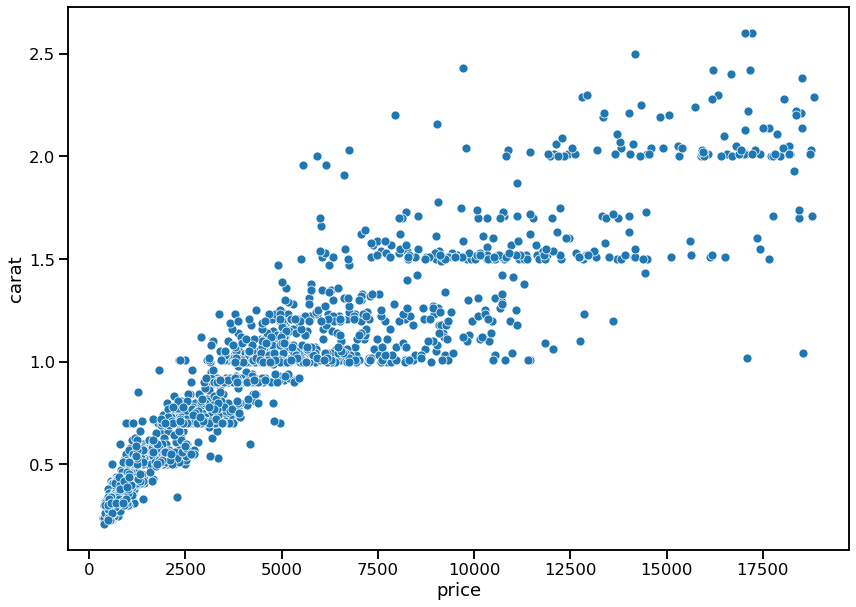

In [6]:
out = sns.scatterplot(x='price', y='carat', data=dat)

Si queremos utilizar un scatter plot con una variable categórica, podemos usar efecto `jitter` sobre los puntos que irían unos encima de otros (es decir, aplicar un poco de desplazamiento para ver nubes de puntos). Para hacer esto, tenemos `stripplot` y `swarmplot`. Como ejercicio, descubre la diferencia entre ambos métodos.

Un ejemplo:

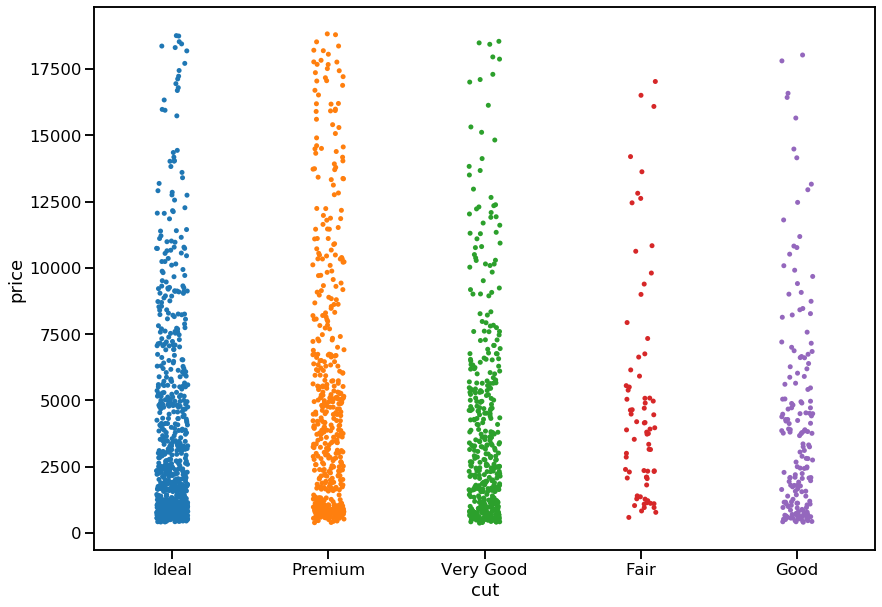

In [7]:
out = sns.stripplot(x='cut', y='price', data=dat)

## Bar plot

Otro estilo de gráfico muy habitual son los de barras. Ten en cuenta que:

* Si representamos una variable en el eje x, y el eje y es el conteo, estamos hablando de [`countplot`](https://seaborn.pydata.org/generated/seaborn.countplot.html)
* Si representamos una variable en el eje x y otra en el eje y, hablamos de [`barplot`](https://seaborn.pydata.org/generated/seaborn.barplot.html)

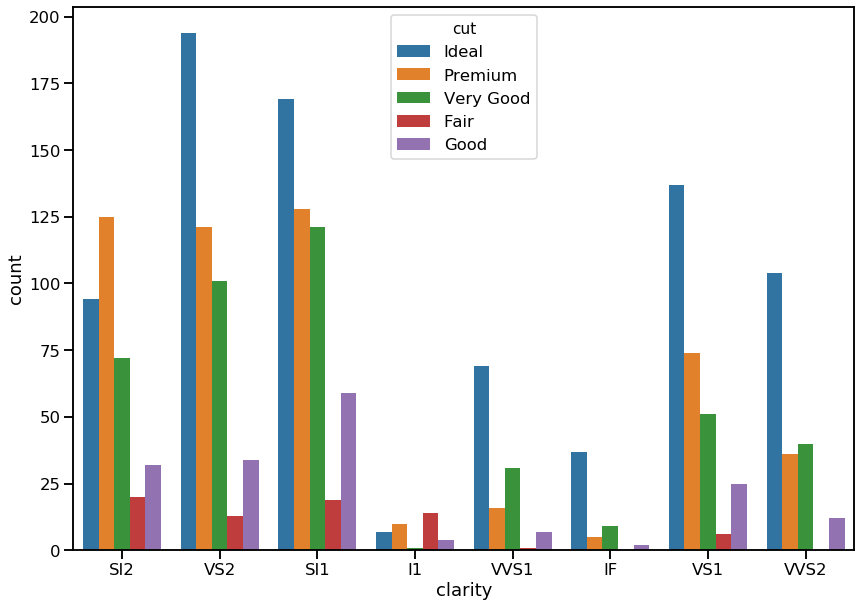

In [8]:
# Un countplot
out = sns.countplot(x='clarity', hue='cut', data=dat)

## Histograma

Para representar la distribución de una variable podemos usar [`distplot`](https://seaborn.pydata.org/generated/seaborn.distplot.html), pasando como argumento la columna de interés.

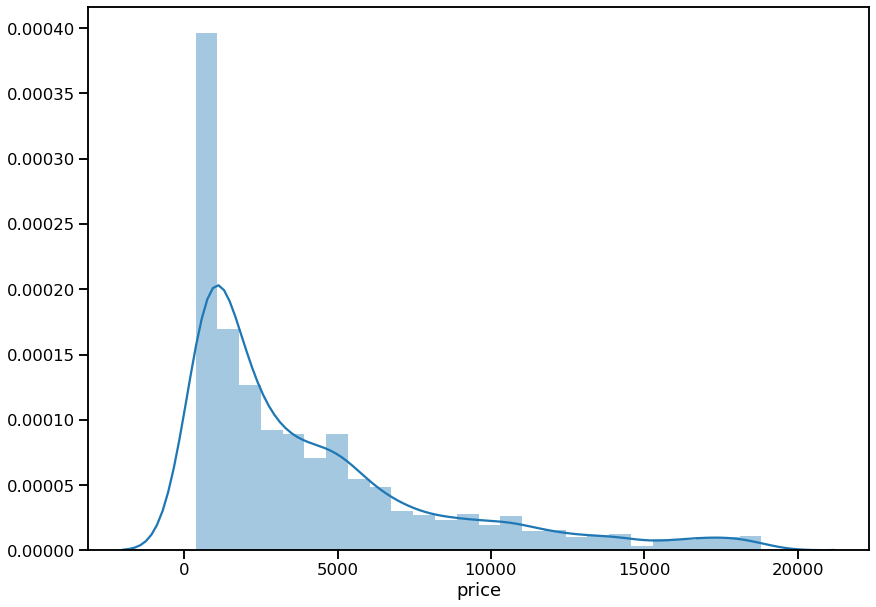

In [9]:
out = sns.distplot(dat.price)

## Escalas

Podemos cambiar la escala de los ejes:

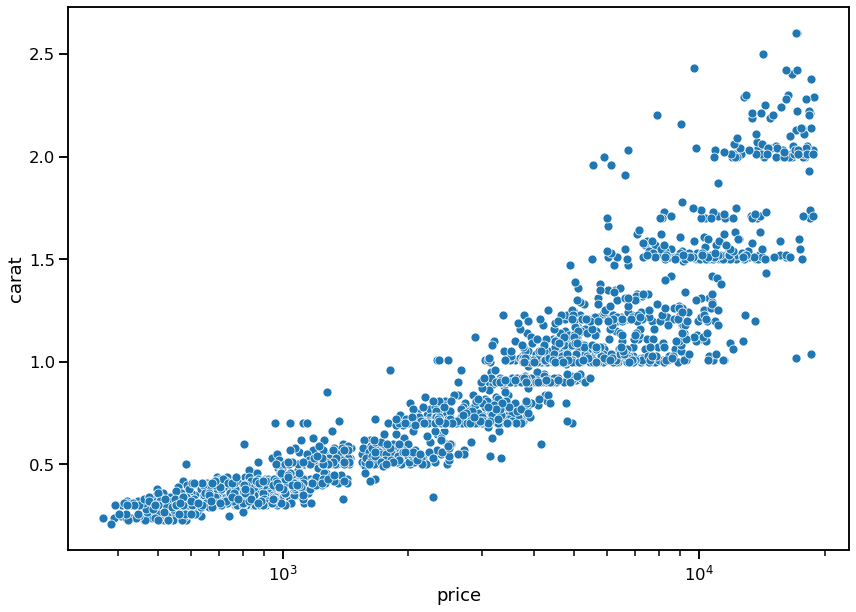

In [10]:
out = sns.scatterplot(x='price', y='carat', data=dat)

# Esta instrucción es de matplotlib, y altera el gráfico actual
plt.xscale('log')

## Facets

Los facets son composiciones de gráficos para comparar datos sobre distintas propiedades. [Aquí](https://seaborn.pydata.org/tutorial/axis_grids.html) tienes una buena referencia sobre cómo generarlos desde seaborn.

Podemos comprar todas nuestras variables numéricas rápidamente con `pairplot`. Opcionalmente, agrupando (coloreando) por alguna categórica:

In [ ]:
out = sns.pairplot(dat, hue='cut')

#### Ejercicio

Investiga el uso de [`FacetGrid`](https://seaborn.pydata.org/tutorial/axis_grids.html) y pinta estos gráficos:

* Los histogramas de `carat` por cada valor de `cut`.
* Un scatterplot de `carat` en x frente a `price` en y, por cada valor de `cut`.
* Un scatterplot de `carat` en x frente a `price` en y, por cada valor de `cut` y `clarity`.

## Ejercicio exploración avistamientos de OVNIs

Vamos a explorar un conjunto de datos sobre avistamientos de OVNIs, disponible en este repositorio en `dat/ufos.csv`. 

Lee los datos y límpialos. Luego, haz un análisis gráfico de los datos contestando a las siguientes preguntas:

* ¿Cómo evoluciona la cantidad de avistamientos a lo largo de los años?
* ¿Cuáles son las formas de OVNI avistadas más frecuentes (y cuál es esa frecuencia)? Con forma me refiero a: luz, óvalo, triángulo, ...
* ¿Hay meses del año en los que es más probable que se produzca un avistamiento? ¿Hay alguna forma que se vea claramente más frecuentemente en algún momento del año?
* ¿Qué países aparecen en el dataset? ¿Cuál tiene mayor número de avistamientos?
* ¿Cómo se distribuye la duración de los avistamientos?
* ¿Cómo se distribuye el tiempo pasado entre el momento del avistamiento (`datetime`) y la fecha de publicación (`date_posted`)?
* Opcional: crea una nube de palabras sobre los comentarios, para ver qué palabras son las más comunes. Puedes usar el paquete [`WordCloud`](https://github.com/amueller/word_cloud) para ello.
* Piensa otras preguntas, intenta ver posibles interacciones entre variables, y pinta los gráficos correspondientes